<a href="https://colab.research.google.com/github/PythonMachineLearningInKorea/SanghoPark/blob/master/Dacon_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
train = pd.read_csv('/content/drive/My Drive/Dacon_Temperature/train.csv')
test = pd.read_csv('/content/drive/My Drive/Dacon_Temperature/test.csv')

In [0]:
temperature_name = ["X00", "X07","X28","X31","X32" ] #기온
localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
speed_name       = ["X02","X03","X18","X24","X26"] #풍속
water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
press_name       = ["X05","X08","X09","X23","X33"] #해면기압
sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량
humidity_name    = ["X12","X20","X30","X37","X38"] #습도
direction_name   = ["X13","X15","X17","X25","X35"] #풍향

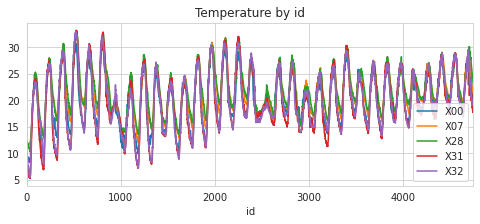

In [10]:
train.plot(x='id', y=temperature_name, figsize = (8, 3), title = "Temperature by id")
# 시사점1: id의 주기별로 업앤다운이 있다.
# 그 주기는 144개 id 주기. 이것은 하루를 10분의 갯수 144로 나눈 것!
# 시사점2: x00, x07, x28, x31, x32들은 큰 차이 없이 비슷함.
# 이들의 평균값을 쓰든 한개만 쓰든 하자.

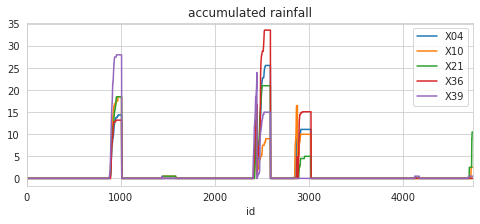

In [13]:
#누적 강수량 파악하기
train.plot(x='id', y=water_name, figsize=(8,3), title="accumulated rainfall")
#비오면 기압도 떨어지고, 기온도 떨어지는 경향

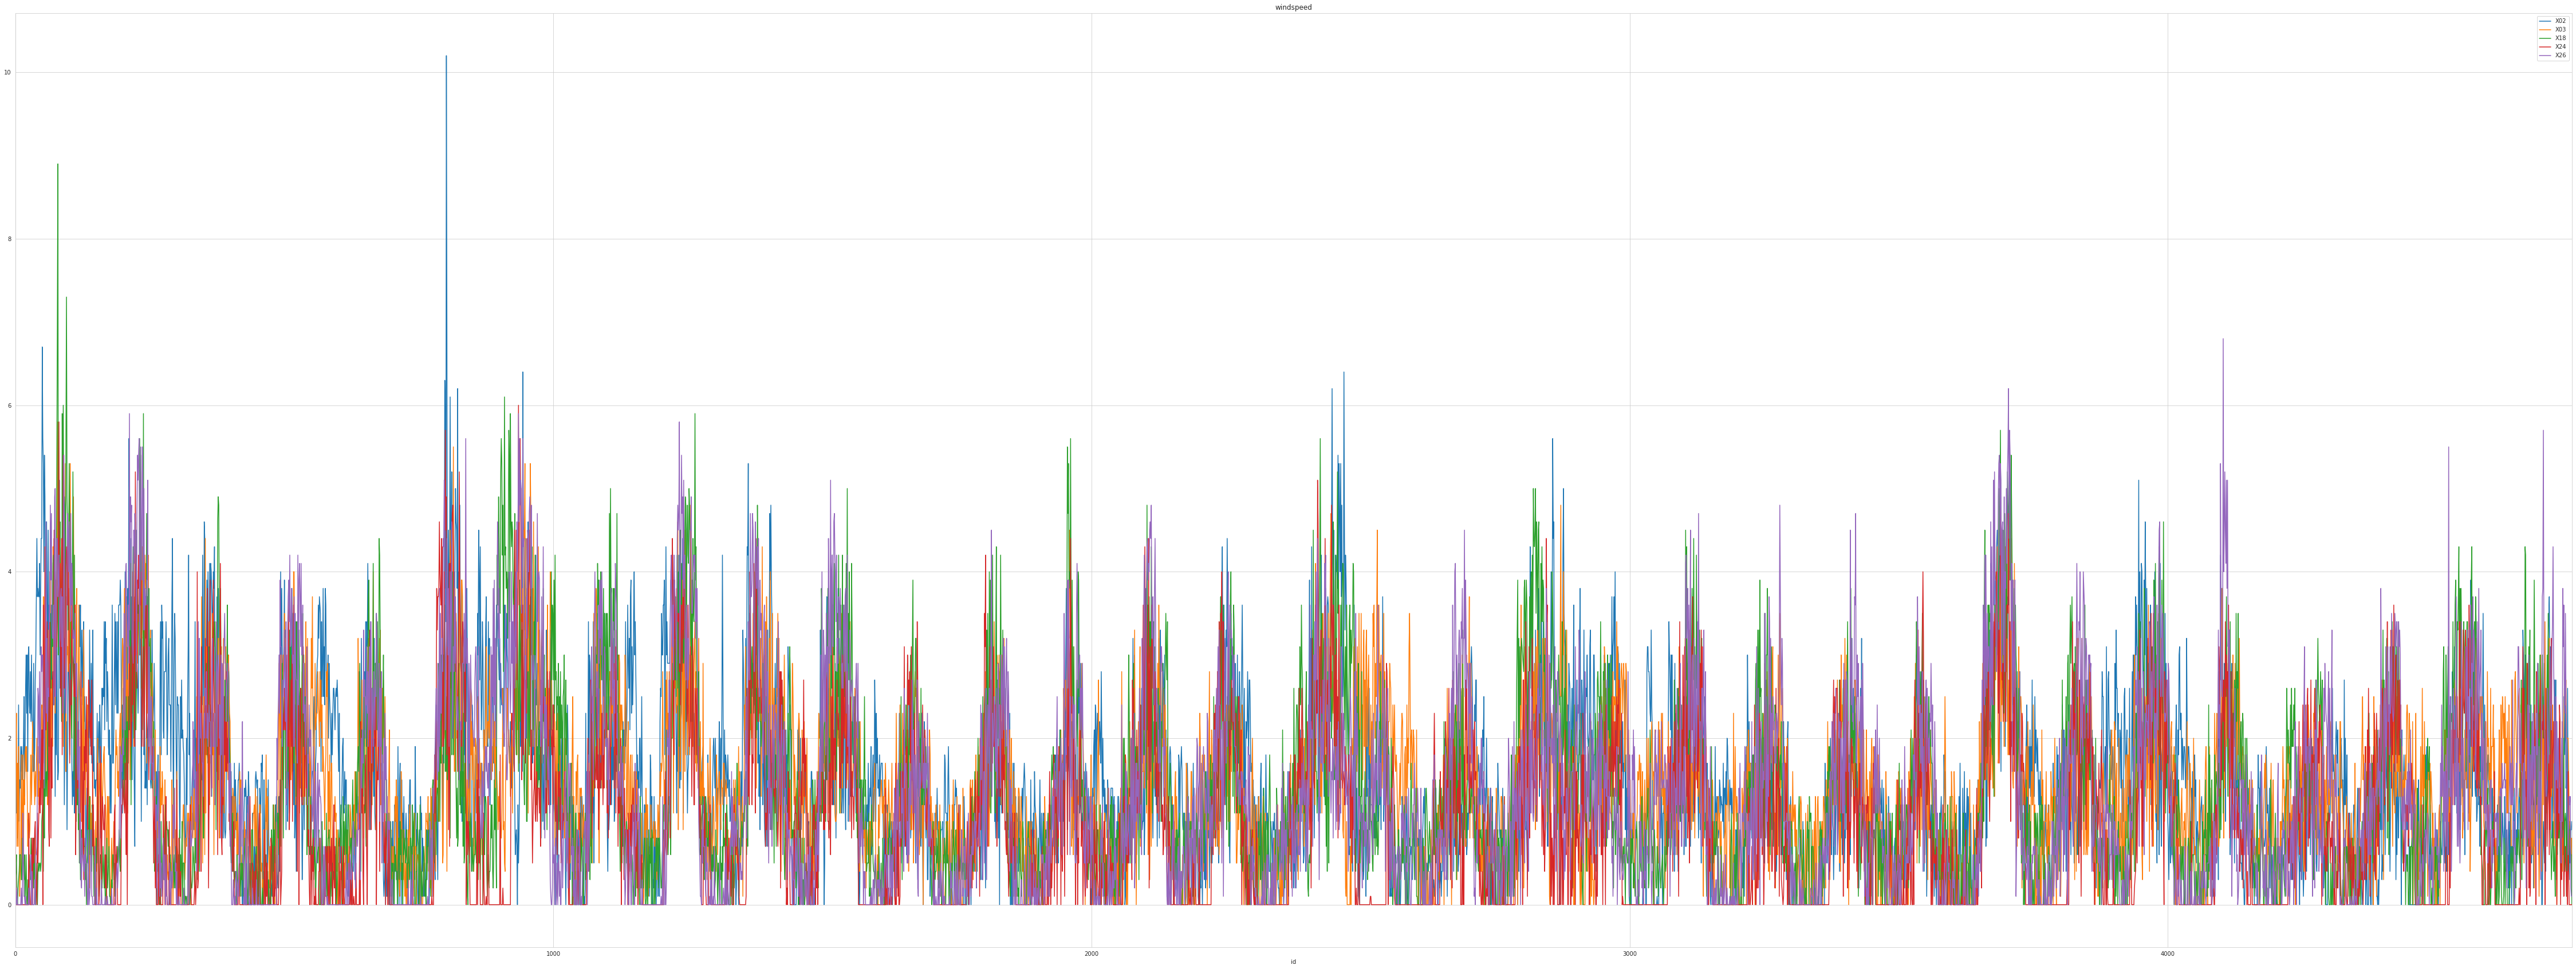

In [18]:
#풍속 파악하기
train.plot(x='id', y=speed_name, figsize=(80,30), title="windspeed")
#대체로 풍속은 X18>X02>X26>X03>X24의 경향(초록>파랑>보라>주황>빨강)
#풍속은 지역별로 다르며 하루하루마다 주기성을 보임

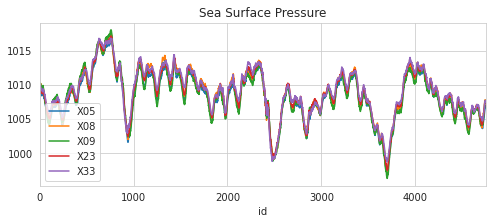

In [15]:
#해면 기압
train.plot(x='id', y=press_name, figsize=(8,3), title="Sea Surface Pressure")
#해면기압과 현지기압은 동일한 패턴을 보임. 현지기압과 positive correlation을 보여

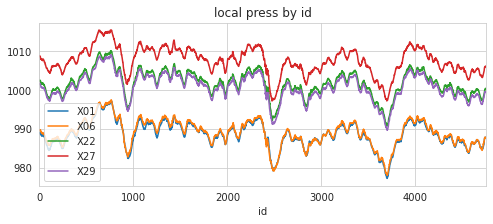

In [17]:
#현지 기압 패턴 파악
train.plot(x='id', y=localpress_name, figsize = (8, 3), title = "local press by id")
#비가 오는 날, 기압이 유난히 떨어짐을 알 수 있음

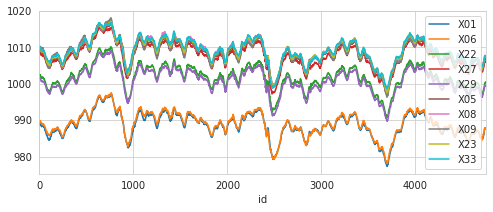

In [12]:
train.plot(x='id', y=["X01","X06","X22","X27","X29","X05","X08","X09","X23","X33"], figsize=(8,3))
#해면 기압과 현지기압

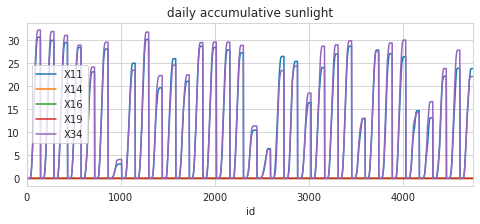

In [19]:
#일일 누적 일사량
train.plot(x='id', y=sun_name, figsize=(8,3), title="daily accumulative sunlight")
#흥미로운 발견. X34와 X11은 일사량이 있으나, 나머지 지역은 보이지 않음
#X34와 X11은 야외에 설치된 센서이나, 
#X14, X16, X19는 실내에 설치된건가? X14, X16, X19는 햇빛에 관한 정보가 전무함.
#X14, X16, X19 변수는 버리고 X34와 X11만 사용할 것을 고려.
#Rainfall과 음의 상관관계가 나타나는 경향

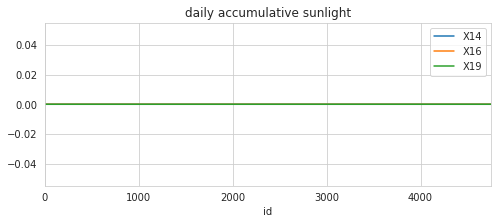

In [20]:
train.plot(x='id', y=["X14", "X16", "X19"], figsize=(8,3), title="daily accumulative sunlight")

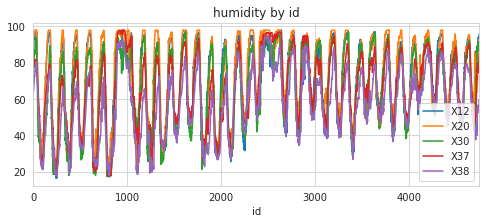

In [21]:
#습도 - 명확히 일별 주기성을 띔.
train.plot(x='id', y=humidity_name, figsize=(8,3), title="humidity by id")

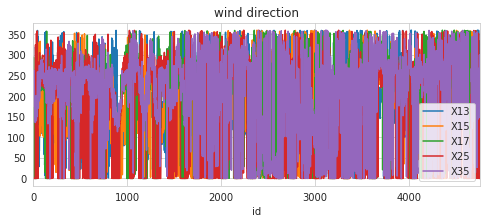

In [22]:
#풍향
train.plot(x='id', y=direction_name, figsize=(8,3), title="wind direction")
#전혀 알 수가 없음=> 8개의 카테고리로 나눌 것.

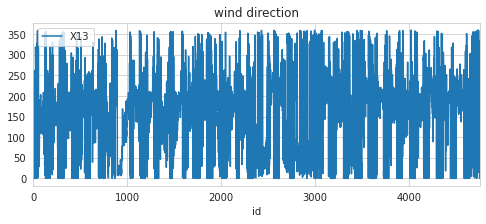

In [23]:
#풍향
train.plot(x='id', y='X13', figsize=(8,3), title="wind direction")

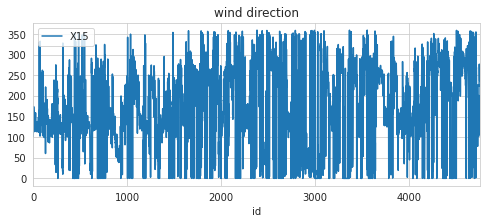

In [24]:
#풍향
train.plot(x='id', y='X15', figsize=(8,3), title="wind direction")

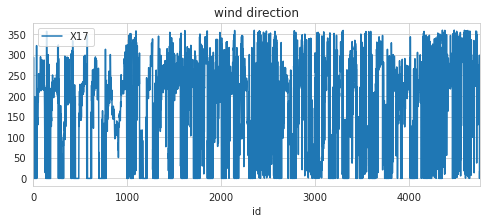

In [25]:
#풍향
train.plot(x='id', y='X17', figsize=(8,3), title="wind direction")

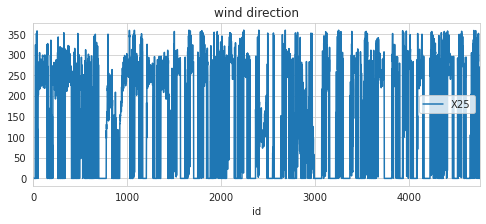

In [26]:
#풍향
train.plot(x='id', y='X25', figsize=(8,3), title="wind direction")

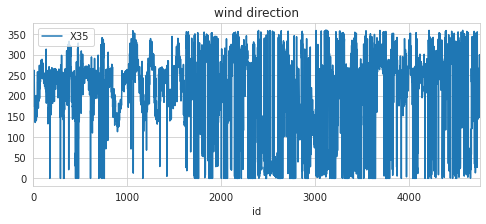

In [27]:
#풍향
train.plot(x='id', y='X35', figsize=(8,3), title="wind direction")

# 풍향으로부터 의미있는 정보를 얻기 힘드니 삭제하자. 하루에도 몇번씩 변하는 모습을 보인다.